In [1]:
!pip install deap

In [0]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import knapsack

In [0]:
knapsack = knapsack.Knapsack01Problem()

POPULATION_SIZE = 50
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 1
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [8]:
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("evaluate", knapsackValue)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [16]:
population = toolbox.populationCreator(n=POPULATION_SIZE)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)

best = hof.items[0]
knapsack.printItems(best)
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding water: weight = 153, value = 200, accumulated weight = 175, accumulated value = 385
- Adding sandwich: weight = 50, value = 160, accumulated weight = 225, accumulated value = 545
- Adding glucose: weight = 15, value = 60, accumulated weight = 240, accumulated value = 605
- Adding banana: weight = 27, value = 60, accumulated weight = 267, accumulated value = 665
- Adding suntan cream: weight = 11, value = 70, accumulated weight = 278, accumulated value = 735
- Adding waterproof trousers: weight = 42, value = 70, accumulated weight = 320, accumulated value = 805
- Adding waterproof overclothes: weight = 43, value = 75, accumulated weight = 363, accumulated value = 880
- Adding note-case: weight = 22, value = 80, accumulated weight = 385, accumulated value = 960
- Adding sunglasses: weight = 7, value = 2

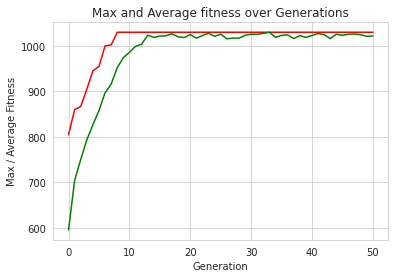

In [10]:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()